# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [18]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-10-30 21:58:12--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2023-10-30 21:58:12 (3.77 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [20]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,418,87,43,70,169,72,7,152,44,19,145,177,341,171,76,6,12,184,187
1,320,105,54,100,220,69,10,221,30,25,170,232,718,202,73,0,13,187,199
2,719,104,53,101,199,65,11,213,31,24,168,216,667,221,72,12,12,187,198
3,473,107,56,105,202,61,11,221,30,25,179,234,725,212,72,15,1,189,196
4,799,92,39,76,180,71,6,152,43,19,131,179,350,143,72,6,14,195,200
5,697,92,37,75,184,70,6,154,42,19,131,184,363,127,71,0,4,198,202
6,695,92,41,66,125,52,7,139,50,18,143,160,275,161,81,7,19,182,184
7,72,92,39,91,191,62,8,176,37,21,137,196,466,151,67,3,23,192,200
8,367,82,37,59,134,63,7,135,51,18,128,151,264,143,82,11,24,179,185
9,688,89,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184


Methods `describe` and `info` deliver some useful information.

In [21]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.151184,94.027322,45.032787,82.704918,170.826958,61.943534,8.737705,170.029144,40.668488,20.670310,148.344262,189.983607,446.353370,175.373406,72.389800,6.442623,12.617486,189.129326,195.872495
std,244.844970,8.246498,6.233798,15.959129,34.042496,8.395477,5.163429,33.697385,7.886937,2.626134,14.715175,31.841156,179.241516,33.027484,7.818724,4.971349,9.029117,6.231515,7.511922
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,168.000000,317.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,422.000000,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,181.000000,370.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,643.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [22]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [23]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, X_test)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [24]:
### YOUR CODE HERE
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10]}
grid_search = GridSearchCV(clf, param_grid)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10]})

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

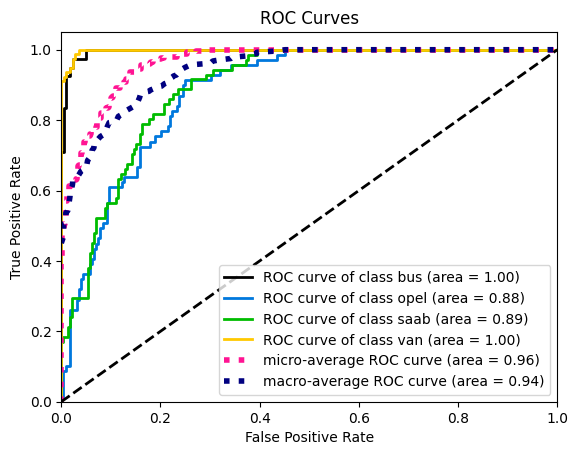

In [25]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score, accuracy_score

y_pred = grid_search.best_estimator_.predict_proba(X_test)
plot_roc(y_test, y_pred)

In [26]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 score: 0.7761496073515216
Accuracy: 0.7845117845117845


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

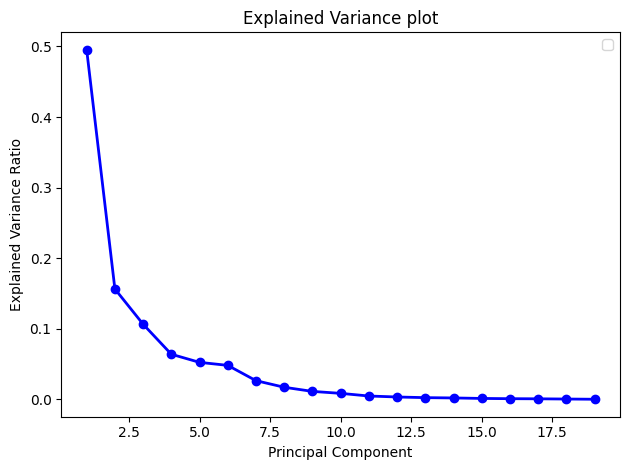

In [27]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
evr = pca.explained_variance_ratio_

plt.plot(range(1,len(evr)+1), evr, 'bo-', linewidth=2)
plt.title("Explained Variance plot")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

we can take as many components as it will be better than 3 $\sigma$ i.e. 99.7%

In [28]:
### YOUR CODE HERE
num_components = [x for x, value in enumerate(np.cumsum(evr)) if value > 0.997][0]
print(r"number of components which gives us more than 3$\sigma$ is", num_components)

new_pca = PCA(num_components)
X_train_new_pca = new_pca.fit_transform(X_train)
X_test_new_pca = new_pca.transform(X_test)

number of components which gives us more than 3$\sigma$ is 13


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [29]:
### YOUR CODE HERE

clf = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {'C': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(clf, param_grid)

grid_search.fit(X_train_new_pca, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0]})

In [30]:
print(grid_search.best_params_)

{'C': 1.0}


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

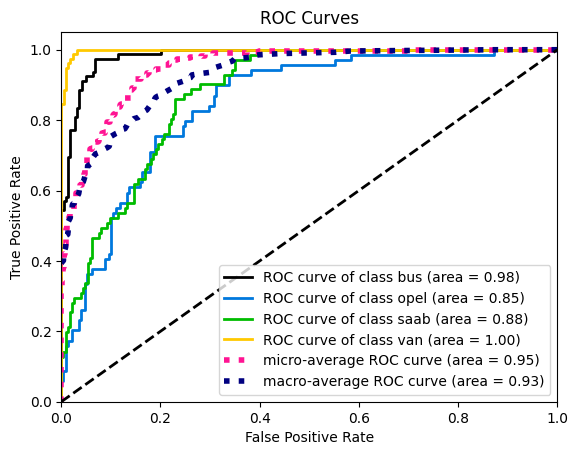

In [31]:
y_pred = grid_search.best_estimator_.predict_proba(X_test_new_pca)
plot_roc(y_test, y_pred)

In [32]:
y_pred = grid_search.best_estimator_.predict(X_test_new_pca)
print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 score: 0.7644033602064878
Accuracy: 0.7744107744107744


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [33]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

tree_param_grid = {"max_depth": np.arange(1, 21)}
wood = DecisionTreeClassifier()
grid_search = GridSearchCV(wood, tree_param_grid)

grid_search.fit(X_train_new_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [34]:
print(grid_search.best_params_)

{'max_depth': 17}


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

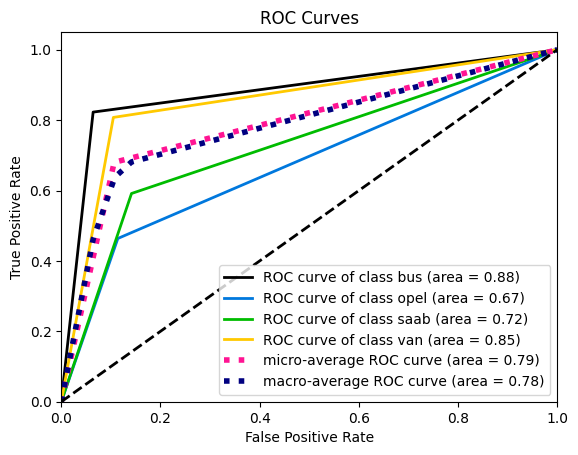

In [35]:
plot_roc(y_test, grid_search.best_estimator_.predict_proba(X_test_new_pca))

In [36]:
y_pred = grid_search.best_estimator_.predict(X_test_new_pca)
print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 score: 0.6685812114387533
Accuracy: 0.6801346801346801


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [37]:
wood_params = grid_search.best_params_ # from the last call in DecisionTree task

In [ ]:
# YOUR CODE HERE
from tqdm import trange
from sklearn.ensemble import BaggingClassifier

f1_score_list_log, accuracy_score_list_log = [], []
f1_score_list_tree, accuracy_score_list_tree = [], []
N_max = 100
N_min = 2
step = 5

for i in trange(N_min, N_max + 1, step):
    logreg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
    bagging_log = BaggingClassifier(logreg, i)
    bagging_log.fit(X_train_new_pca, y_train)
    y_pred_log = bagging_log.predict(X_test_new_pca)

    wood = DecisionTreeClassifier(**wood_params)
    bagging_wood = BaggingClassifier(wood, i)
    bagging_wood.fit(X_train_new_pca, y_train)
    y_pred_wood = bagging_wood.predict(X_test_new_pca)

    f1_score_list_log.append(f1_score(y_test, y_pred_log, average="macro"))
    accuracy_score_list_log.append(accuracy_score(y_test, y_pred_log))

    f1_score_list_tree.append(f1_score(y_test, y_pred_wood, average="macro"))
    accuracy_score_list_tree.append(accuracy_score(y_test, y_pred_wood))

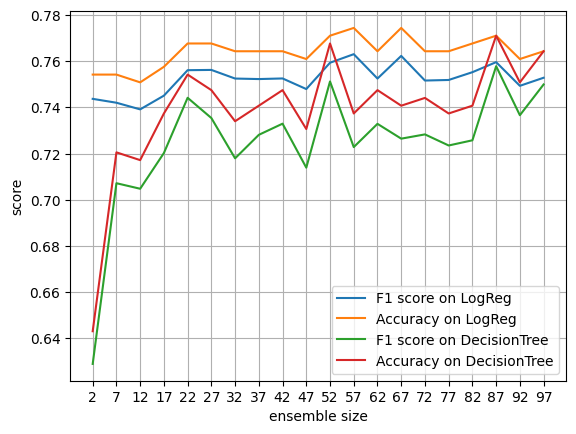

In [39]:
plt.plot(range(2, N_max + 1, step), f1_score_list_log, label="F1 score on LogReg")
plt.plot(range(2, N_max + 1, step), accuracy_score_list_log, label="Accuracy on LogReg")
plt.plot(range(2, N_max + 1, step), f1_score_list_tree, label="F1 score on DecisionTree")
plt.plot(range(2, N_max + 1, step), accuracy_score_list_tree, label="Accuracy on DecisionTree")
plt.xlabel("ensemble size")
plt.xticks(range(2, N_max + 1, step))
plt.ylabel("score")
plt.grid()
plt.legend()
plt.show()



*   In the plot we can see that bagging is good for Decision Trees because their F1 and Acc are growing while the same metrics for LogReg are almost change almost insensibly
*   Optimal value of hyperparameters depends on the sample. It would be better to find the optimal hyperparam for every model in ensemble but it wont improve the result much.



#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

100%|██████████| 20/20 [00:05<00:00,  3.41it/s]


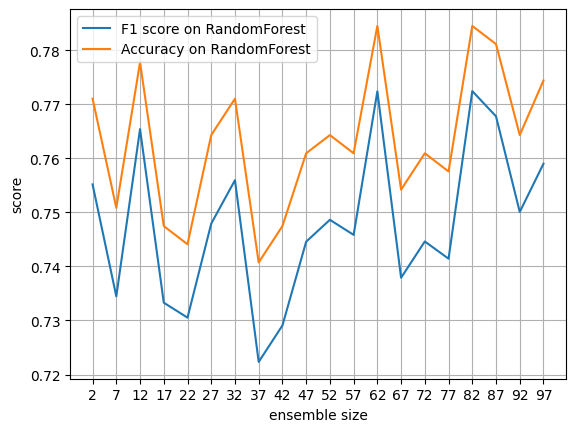

In [49]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import trange

# YOUR CODE HERE
f1_score_list, accuracy_score_list = [], []
N_max = 100
N_min = 2
step = 5

for i in trange(N_min, N_max, step):
    randforest = RandomForestClassifier()
    randforest.fit(X_train_new_pca, y_train)
    y_pred = randforest.predict(X_test_new_pca)
    f1_score_list.append(f1_score(y_test, y_pred, average="macro"))
    accuracy_score_list.append(accuracy_score(y_test, y_pred))

plt.plot(range(N_min, N_max + 1, step), f1_score_list, label="F1 score on RandomForest")
plt.plot(range(N_min, N_max + 1, step), accuracy_score_list, label="Accuracy on RandomForest")
plt.xlabel("ensemble size")
plt.xticks(range(N_min, N_max + 1, step))
plt.ylabel("score")
plt.grid()
plt.legend()
plt.show()

In [50]:
randforest_params = randforest.get_params()
randforest_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

*   The optimal number of trees are 82.Yes it differs from the optimal number of logregs which is 67 and from the number of decision trees which is 87. But it is near the middle between them.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [46]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold

num_splits = 10
skf = StratifiedKFold(n_splits=num_splits, shuffle=True)

f1_score_list_log, f1_score_list_tree, f1_score_list_forest = [], [], []
acc_score_list_log, acc_score_list_tree, acc_score_list_forest = [], [], []

for train_index, test_index in skf.split(X_train_new_pca, y_train):
    X_t = X_train_new_pca[train_index]
    y_t = y_train[train_index]

    logreg = LogisticRegression(C=1.0, max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
    wood = DecisionTreeClassifier(**wood_params)
    randforest = RandomForestClassifier(**randforest_params)

    logreg.fit(X_t, y_t)
    wood.fit(X_t, y_t)
    randforest.fit(X_t, y_t)

    f1_score_list_log.append(f1_score(y_test, logreg.predict(X_test_new_pca), average='macro'))
    f1_score_list_tree.append(f1_score(y_test, wood.predict(X_test_new_pca), average='macro'))
    f1_score_list_forest.append(f1_score(y_test, randforest.predict(X_test_new_pca), average='macro'))

    acc_score_list_log.append(accuracy_score(y_test, logreg.predict(X_test_new_pca)))
    acc_score_list_tree.append(accuracy_score(y_test, wood.predict(X_test_new_pca)))
    acc_score_list_forest.append(accuracy_score(y_test, randforest.predict(X_test_new_pca)))

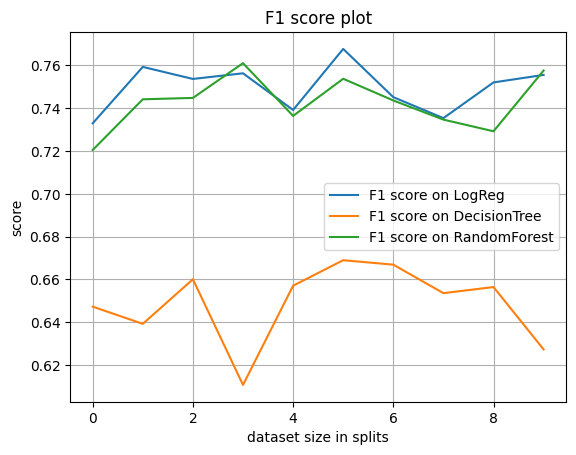

In [47]:
plt.plot(range(num_splits), f1_score_list_log, label="F1 score on LogReg")
plt.plot(range(num_splits), f1_score_list_tree, label="F1 score on DecisionTree")
plt.plot(range(num_splits), f1_score_list_forest, label="F1 score on RandomForest")
plt.xlabel("dataset size in splits")
plt.ylabel("score")
plt.title("F1 score plot")
plt.grid()
plt.legend()
plt.show()

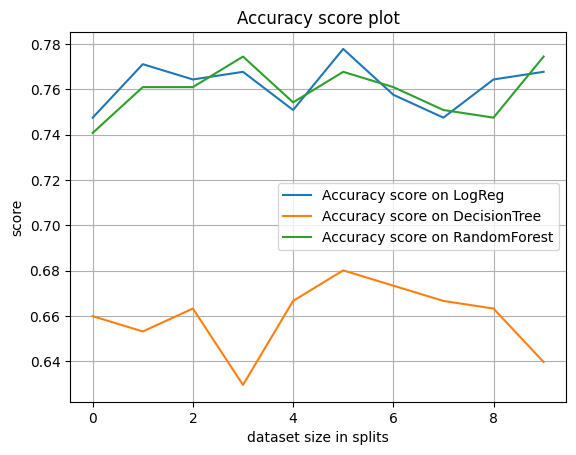

In [48]:
plt.plot(range(num_splits), acc_score_list_log, label="Accuracy score on LogReg")
plt.plot(range(num_splits), acc_score_list_tree, label="Accuracy score on DecisionTree")
plt.plot(range(num_splits), acc_score_list_forest, label="Accuracy score on RandomForest")
plt.xlabel("dataset size in splits")
plt.ylabel("score")
plt.title("Accuracy score plot")
plt.grid()
plt.legend()
plt.show()



*   All three plots have peaks at particular size of dataset and then scores decrease.




#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [54]:
# YOUR CODE HERE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

N_min = 2
N_max = 100
step = 5

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
param_grid = {"max_depth": trange(N_min, N_max + 1, step)}
clf = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", cv=kfold)

grid_search.fit(X_train_new_pca, y_train_encoded)
print(grid_search.best_params_)

{'max_depth': 12}


In [60]:
clf = XGBClassifier(n_estimators=grid_search.best_params_['max_depth'])

clf.fit(X_train_new_pca, y_train_encoded)
y_pred = le.inverse_transform(clf.predict(X_test_new_pca))

print("F1 score:", f1_score(y_test, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_test, y_pred))

F1 score: 0.7258002546541286
Accuracy: 0.7407407407407407


here everything it quite clear